In this analysis I will be analyzing two datasets in order to answer my research questions which is: Is there an association between average household income and service requests? What is the relationship between average household income and non-parking related service requests? What is the relationship between average household income and parking related service requests? 

The first dataset provided is from DC’s 311 service request center. It contains information about different types of service requests such as abandon cars, parking meter repairs, and trash pickup. Furthermore, the data describes where the service requests were taken and more specific descriptions of each incident.

The second dataset shows the mean and median incomes of each ward in DC.

Links: https://opendata.dc.gov/datasets/311-city-service-requests-in-2014 https://gimletmedia.com/shows/science-vs/39hzkk

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
# read data sets
service = pd.read_csv('311_City_Service_Requests_in_2014.csv')
ward = pd.read_csv('WardIncome.csv')

In [105]:
# drops first two columns because they are not needed
service = service.drop(['X', 'Y'], axis = 1)

In [106]:
#create data frame
parking = service.loc[(service['SERVICECODEDESCRIPTION'].isin([ "Parking Enforcement", 
                                                               "Parking Meter Repair", "Abandoned Vehicle - On Public Property", 
                                                               "Abandoned Vehicle - On Private Property", 
                                                               "Residential Parking Permit Violation", 
                                                               "Emergency No-parking Verification"]))]

not_parking = service.loc[~(service['SERVICECODEDESCRIPTION'].isin([ "Parking Enforcement", 
                                                               "Parking Meter Repair", "Abandoned Vehicle - On Public Property", 
                                                               "Abandoned Vehicle - On Private Property", 
                                                               "Residential Parking Permit Violation", 
                                                               "Emergency No-parking Verification"]))]

In [107]:
#aggregate
x = parking[["WARD", "SERVICECODEDESCRIPTION"]].groupby(["WARD"]).agg("count")
x = x.reset_index()
x.columns = ["Ward", "Parking "]


In [108]:
#aggregate
y = not_parking[["WARD", "SERVICECODEDESCRIPTION"]].groupby(["WARD"]).agg("count")
y = y.reset_index()
y.columns = ["Ward", "Non-Parking"]


In [109]:
# merge
df = pd.merge(y, x, how = "inner", on = "Ward")
df
both = pd.merge(fruit, ward, how = "inner", on = "Ward")
both.columns = ["Ward", "Non-Parking", "Parking", "Median Household Income in USD", "Mean Household Income in USD"]
both

,Ward,Non-Parking,Parking,Median Household Income in USD,Mean Household Income in USD
0,1.0,18403,11021,82159,106388
1,2.0,16844,66196,100388,140459
2,3.0,21825,9163,112873,176921
3,4.0,34030,5472,74600,111933
4,5.0,29764,6505,57554,77329
5,6.0,29753,30500,94343,117002
6,7.0,23623,2861,39165,53093
7,8.0,14817,2197,30910,44245


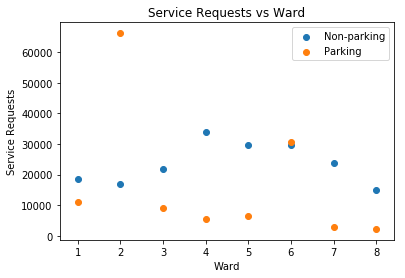

In [110]:
#scatter plot that shows requests per ward
notparking = plt.scatter(join["Ward"], join["Non-Parking Request Count"])
parking = plt.scatter(join["Ward"], join["Parking Request Count"])
plt.title("Service Requests vs Ward")
plt.xlabel("Ward")
plt.ylabel("Service Requests")
plt.legend((notparking, parking),
          ('Non-parking', 'Parking'))
plt.show()

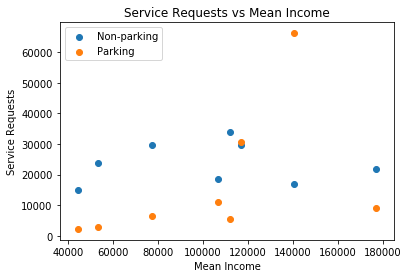

In [111]:
#scatter plot to show requests per avg income
nopark = plt.scatter(join["Mean Household Income in USD"], join["Non-Parking Request Count"])
prking = plt.scatter(join["Mean Household Income in USD"], join["Parking Request Count"])
plt.title("Service Requests vs Mean Income")
plt.xlabel("Mean Income")
plt.ylabel("Service Requests")
plt.legend((nopark, prking),
          ('Non-parking', 'Parking'))
plt.show()

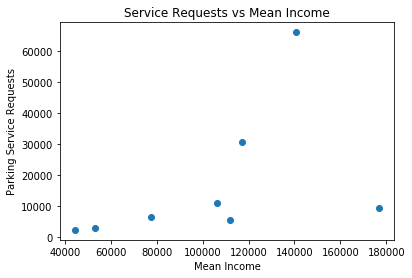

In [112]:
# parking requests grouped by the mean income

plt.scatter(join["Mean Household Income in USD"], join["Parking Request Count"])
plt.title("Service Requests vs Mean Income")
plt.xlabel("Mean Income")
plt.ylabel("Parking Service Requests")
plt.show()

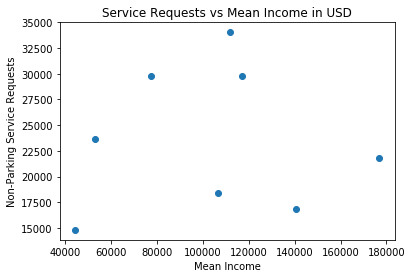

In [113]:
# non parking requests grouped by the mean income
plt.scatter(join["Mean Household Income in USD"], join["Non-Parking Request Count"])
plt.title("Service Requests vs Mean Income in USD")
plt.xlabel("Mean Income")
plt.ylabel("Non-Parking Service Requests")
plt.show()

Non-parking related issues are generally more abundant in wards with lower average incomes. Although, when the mean income reaches $150,000, it shows that there are higher parking requests. This can indicate that this area is gentrified. The data shown here can indicate that gentrification is occurring since the neighborhoods are leaning towards having more requests that are non-parking related. 

As the data shows, neighborhoods are becoming more and more gentrified and therefore the people who currently live there may not earn enough to continue to live there. This results in many people moving out of these areas to more affordable provinces.

Some limitations to the data can include the way data was filtered. In the first assignment, I filtered the data very vaguely and therefore, there could be some parking related descriptions that I missed while wrangling the data in this analysis. 